* This  func basically same as the 010_11 - Classification_Model, the difference is, the func will not take a original database, but the 3 trained and mlFixed datas, Vocab, prob_ctg_1, prob_ctg_0 as a start point.

# Import nltk tools

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Switch area
SUBJECT = 'color_way'
# SUBJECT_set_1 for col classify= [ 'brand', 'style', 'item', 'description', 'spec', 'width:', 'weight:', 'position', 'color_way', 'supplier', 'ref', 'qty', 'price/unit', 'unit', ]

VOCAB_SIZE = 900
# If VOCAB_SIZE is great than the row of database, it will cause error and stop the calculating on the step "Create Vocabulary with WORD_ID".

TEST_SIZE = 0.1 # proportion, the size of test_set

# for record the result in the excel file.
RECORD_FILE = 'Matrix_and_Trained-data_records_main-file.csv'

# Remenber to fillout it by manual !!!!!
# The matrix you used in the 010_01_Matrix_Generator, for checking the precision of matrix, 
MATRIX = 'col_classify_matrix_trimed_delete-none-material-col_20200404.csv'
# MATRIX = 'col_classify_matrix_trimed_20200330_double_the_True_description.csv'

# Wrod processing

In [2]:
data = pd.read_csv('result/Matrix/' + SUBJECT + '_matrix.csv')

* Name the index as "MATERIAL_IDs"
* The matrix must has it unrepeated Id before import to here, show as the "Unnamed: 0".

In [3]:
data.head()

,Unnamed: 0,material,color_way
0,0,", scott usa",0
1,1,", scott usa",0
2,2,", scott usa",0
3,3,", scott usa",0
4,4,", scott usa",0


* Change the col "Unnamed: 0" as "MATERIAL_ID"

In [4]:
data.rename( columns = {'Unnamed: 0': 'MATERIAL_ID'}, inplace = True)

In [5]:
data.head()

,MATERIAL_ID,material,color_way
0,0,", scott usa",0
1,1,", scott usa",0
2,2,", scott usa",0
3,3,", scott usa",0
4,4,", scott usa",0


* Set the original index as Index

In [6]:
data.set_index('MATERIAL_ID', inplace = True)

In [7]:
data.tail()

,material,color_way
MATERIAL_ID,,
3815,", 3.55', '3.5', '3.55', '3.55', '3.5', '0.82',...",0
3816,", 3.5', '3.5', '0.82', '1.6', '0.47', '0.25603...",0
3817,", 3.5', '3.5', '3.5', '0.82', '1.6', '3.3', '0...",0
3818,", 3.5', '3.345', '0.82', '0.84', '1.12', '1.1...",0
3819,", 3.67', '3.5', '3.5', '3.5', '0.82', '1.12', ...",0


## Nltk Function

In [8]:
def nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
#             filtered_words.append(stemmer.stem(word))
            filtered_words.append(word)
            
    return filtered_words

* Test the function, with row 0, in column 'material'

In [9]:
nltk_convert(data.at[0, 'material'])

['scott', 'usa']

## Applying to the matrix
* the variable "nested_list" will hold the result.
* It is a series in this moment.

In [10]:
%%time
nested_list = data.material.apply(nltk_convert)

CPU times: user 1.89 s, sys: 101 ms, total: 1.99 s
Wall time: 2 s


In [11]:
type(nested_list)

pandas.core.series.Series

## True and False categories
* Exact the index of fabric materials, and non fabric materials

In [12]:
material_ids_ctg_1 = data[data[SUBJECT] == 1].index
material_ids_ctg_0 = data[data[SUBJECT] ==0].index

In [13]:
material_ids_ctg_1

Int64Index([2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113,
            ...
            3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099],
           dtype='int64', name='MATERIAL_ID', length=996)

### Get materials back by index
* Exact the strings in col 'material' by the index of doc_ids_fabric

In [14]:
nested_list_ctg_1 = nested_list.loc[material_ids_ctg_1]

In [15]:
nested_list_ctg_1

MATERIAL_ID
2104    [eclipse, blue, orange, grey, white, blue, blu...
2105    [lunar, blue, blue, blue, blue, blue, blue, bl...
2106    [moroccan, red, red, red, red, red, red, ketch...
2107    [lunar, blue, blue, blue, available, available...
2108    [marine, blue, blue, white, blue, blue, blue, ...
                              ...                        
3095                                                   []
3096                                                   []
3097                                                   []
3098    [mint, julep, julep, julep, oxidized, oxidized...
3099                                                   []
Name: material, Length: 996, dtype: object

* by the index of doc_ids_trim

In [16]:
nested_list_ctg_0 = nested_list.loc[material_ids_ctg_0]

In [17]:
nested_list_ctg_0.shape[0]

2824

## Number of Distinct words
* The Ctg_1

In [18]:
flat_list_ctg_1 =[item for sublist in nested_list_ctg_1 for item in sublist]

In [19]:
ctg_1_words = pd.Series(flat_list_ctg_1).value_counts()

In [20]:
ctg_1_words.shape

(330,)

* The Ctg_0

In [21]:
flat_list_ctg_0 = [item for sublist in nested_list_ctg_0 for item in sublist]

In [22]:
ctg_0_words = pd.Series(flat_list_ctg_0).value_counts()

In [23]:
ctg_0_words.head()

pocket    1708
side      1598
label     1354
zipper     964
per        857
dtype: int64

# Generate Vocabulary
## Top 10 words in Matrix (ctg_1 and ctg_0)

* It is same as function the nltk_convert, the difference is in the end of the funciton, it not append word directly, but word converted by function stemmer.stem.

In [24]:
def stemmered_nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [25]:
%%time
stemmed_nested_list = data.material.apply(stemmered_nltk_convert)

CPU times: user 2.95 s, sys: 105 ms, total: 3.06 s
Wall time: 3.07 s


* Get flat list for all words

In [26]:
flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

* Turn it to a series

In [27]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()

In [28]:
unique_words

black        2251
pocket       2163
tape         1819
zipper       1813
label        1790
             ... 
revis           1
carelabel       1
evergreen       1
cab             1
moos            1
Length: 1350, dtype: int64

* Set the size of vacabulary
* This size need to be tested a lot, in this cace, follow the e-mail processing lecture, I takes 10 % of total particular words

In [29]:
VOCAB_SIZE

900

In [30]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [31]:
print('Most common words: \n', frequent_words[:10])

Most common words: 
 black     2251
pocket    2163
tape      1819
zipper    1813
label     1790
color     1722
side      1638
shell     1491
oxid       987
slider     987
dtype: int64


## Create Vocabulary with WORD_ID

In [32]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,black
1,pocket
2,tape
3,zipper
4,label


* Save the vocabulary

In [33]:
vocab.to_csv('result/Trained Data/Vocabulary/'+SUBJECT+'_vocabulary.csv')

* Test the any word to see if it is in the vocabulary

In [34]:
'hangtag' in set(vocab.VOCAB_WORD)

True

## Search out the material with most token

In [35]:
clean_material_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr wrods in the longest material:', max(clean_material_lengths))

Nr wrods in the longest material: 491


In [36]:
print('Material position in the list', np.argmax(clean_material_lengths))

Material position in the list 1738


In [37]:
stemmed_nested_list[np.argmax(clean_material_lengths)]

['main',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'bodi',
 'left',
 'chest',
 'yoke',
 'hand',
 'pocket',
 'flap',
 'cuff',
 'inner',
 'center',
 'front',
 'storm',
 'flap',
 'skirt',
 'hand',
 'gaitor',
 'bag',
 'sleev',
 'inner',
 'bodi',
 'hood',
 'line',
 'panel',
 'collar',
 'chin',
 'guard',
 'hand',
 'pocket',
 'bag',
 'vent',
 'mesh',
 'pocket',
 'hand',
 'gaiter',
 'section',
 'bodi',
 'line',
 'quilt',
 'panel',
 'seam',
 'seal',
 'zipper',
 'zipper',
 'zipper',
 'pocket',
 'pocket',
 'pocket',
 'pocket',
 'side',
 'entri',


# Generate Features & Spare Matrix
### Creating a DataFrame with one word per column

In [38]:
type(stemmed_nested_list)

pandas.core.series.Series

In [39]:
stemmed_nested_list

MATERIAL_ID
0       [scott, usa]
1       [scott, usa]
2       [scott, usa]
3       [scott, usa]
4       [scott, usa]
            ...     
3815              []
3816              []
3817              []
3818              []
3819              []
Name: material, Length: 3820, dtype: object

In [40]:
type(stemmed_nested_list.tolist())

list

In [41]:
word_col_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_col_df

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
0,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3816,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3817,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3818,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Traning Set and Test Set
* Must import the method "train_test_split()" from sklearn

In [42]:
X_train, X_test, y_train, y_test = train_test_split(word_col_df, data[SUBJECT],
                                                    test_size = TEST_SIZE)

In [43]:
print('Nr of traning samples', X_train.shape[0])
print('Fraction of traning set', X_train.shape[0] / word_col_df.shape[0])

Nr of traning samples 3438
Fraction of traning set 0.9


In [44]:
X_train.index.name = X_test.index.name = 'MATERIAL_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3494,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
727,biella,jacket,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2996,teeth,color,ykk,rl,bright,zipper,tape,color,tcx,black,...,None,None,None,None,None,None,None,None,None,None
2846,black,mantl,mantl,seam,tape,satin,line,dead,flower,print,...,None,None,None,None,None,None,None,None,None,None
3709,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [45]:
y_train.head()

MATERIAL_ID
3494    0
727     0
2996    1
2846    1
3709    0
Name: color_way, dtype: int64

## Sparse Matrix for the traning data
* Get vocabulary turned as an Index:

In [46]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['black', 'pocket', 'tape', 'zipper', 'label', 'color', 'side', 'shell',
       'oxid', 'slider',
       ...
       'standard', 'check', 'tether', 'rise', 'teri', 'translat', 'waydu',
       'honeycomb', 'pullov', 'indic'],
      dtype='object', name='VOCAB_WORD', length=900)

In [47]:
y_train.shape[0]

3438

### Sparse Matrix Function

In [48]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix as dataframe
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'MATERIAL_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

## Training data
### Applying to the traning set

In [49]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 9.08 s, sys: 57.5 ms, total: 9.14 s
Wall time: 9.26 s


In [50]:
sparse_train_df

,LABEL,MATERIAL_ID,OCCURENCE,WORD_ID
0,0,727,1,248
1,0,727,1,54
2,1,2996,1,13
3,1,2996,1,5
4,1,2996,1,24
...,...,...,...,...
72381,0,1371,1,443
72382,0,1371,1,4
72383,0,1371,1,676
72384,0,1371,1,454


In [51]:
sparse_train_df.shape

(72386, 4)

### Group by the DOC_ID

In [52]:
train_grouped = sparse_train_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
MATERIAL_ID WORD_ID LABEL           
0           415     0              1
            416     0              1
1           415     0              1
            416     0              1
2           415     0              1
...                              ...
3809        269     0              1
3810        417     0              1
3811        417     0              1
3812        417     0              1
3813        417     0              1

[26608 rows x 1 columns]

* Distribute the DOC_ID to each row

In [53]:
train_grouped = train_grouped.reset_index()

In [54]:
train_grouped

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,0,415,0,1
1,0,416,0,1
2,1,415,0,1
3,1,416,0,1
4,2,415,0,1
...,...,...,...,...
26603,3809,269,0,1
26604,3810,417,0,1
26605,3811,417,0,1
26606,3812,417,0,1


### Save Traning Data
* We save it as a txt file, with only numbers of the IDs, Occurances, label, as showed above. 

In [55]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_traning_data', train_grouped, fmt = '%d')

## Test Data
* The way to create it is basically same way as treating traning data.

In [56]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,481,482,483,484,485,486,487,488,489,490
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
420,scott,usa,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
22,blair,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3779,pcs,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1268,polyest,suppli,soli,polyest,suppli,soli,terri,emboss,taffeta,nylon,...,None,None,None,None,None,None,None,None,None,None
67,airblast,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [57]:
y_test.head()

MATERIAL_ID
420     0
22      0
3779    0
1268    0
67      0
Name: color_way, dtype: int64

In [58]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 1.17 s, sys: 14.9 ms, total: 1.19 s
Wall time: 1.25 s


In [59]:
test_grouped = sparse_test_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,7,415,0,1
1,7,416,0,1
2,8,415,0,1
3,8,416,0,1
4,9,415,0,1


In [60]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_test_data', test_grouped, fmt = '%d')

# Full Matrix
* Create anempty df first

### Columns of Full Matrix
* The empty df with column 'DOC_ID', in the case I use 'MATERIAL_ID'
* Second column is 'CATEGORY'
* The rest column is number from 0 to the number of words in vocabulary.

In [61]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

### Rows of Full Matrix
* If consists of Material_ID in Training Data
* Numpy method np.unique() will take a number 1 time, even it occurs many time in the Traning Data.
* Import the traning data we saved as txt

In [62]:
TRANING_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_traning_data'

* Open it by Numpy

In [63]:
sparse_train_data = np.loadtxt(TRANING_DATA, delimiter = ' ', dtype=int)

In [64]:
index_names = np.unique(sparse_train_data[:, 0])

### Form the Data Frame
* Create an empty df, columned by column_names, indexed by index_names
* Fullfill all the cell with value "0"

In [65]:
full_train_data = pd.DataFrame(index= index_names, columns = column_names)
full_train_data.fillna(value = 0, inplace = True)
full_train_data.shape

(2464, 902)

## Make a Full matrix function

In [66]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx = 0, word_idx = 1, cat_idx = 2, freq_idx = 3):
    column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = doc_id_names, columns = column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'MATERIAL_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('MATERIAL_ID', inplace = True)
    return full_matrix

In [67]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 1.42 s, sys: 20.1 ms, total: 1.44 s
Wall time: 1.27 s


In [68]:
full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Probability of Category_1 in train_data

In [69]:
full_train_data.CATEGORY.size

2464

In [70]:
full_train_data.CATEGORY.sum()

642

In [71]:
prob_ctg_1 = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability  of ' + SUBJECT +' is', prob_ctg_1)

Probability  of color_way is 0.26055194805194803


In [72]:
prob_ctg_1

0.26055194805194803

In [73]:
prob_ctg_1_in_train_data = pd.DataFrame({'prob_ctg_1_train_set':[prob_ctg_1]})

In [74]:
prob_ctg_1_in_train_data.to_csv('result/Trained Data/Train_set/' + SUBJECT + '_prob_ctg_1_in_train_data')

# Count each material in train_data have how many tokens
## Full train Features
* It is very simple. The whole df of train_data without the column 'CATEGORY' is the Full train Features
* Create a new df with no column 'CATEGORY'

In [75]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [76]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# full_train_features[1249].sum()

### Number of tokens each material has in train_data
* We added up all values in row direction, to get sum of each row 

In [78]:
material_train_data = full_train_features.sum(axis = 1) 
material_train_data.shape # Show how many materials in train_data

(2464,)

In [79]:
material_train_data # Show how many words each material in train_data has

MATERIAL_ID
0       2
1       2
2       2
3       2
4       2
       ..
3809    1
3810    1
3811    1
3812    1
3813    1
Length: 2464, dtype: int64

* Total number of words in train_data

In [80]:
total_words_train_data = material_train_data.sum()
total_words_train_data

72386

#### Token of ctg_1 in train_data
* Number of particular words of category 1, in train_data
* The word can be called "token"

In [81]:
ctg_1_in_train_data = material_train_data[full_train_data.CATEGORY == 1]
ctg_1_in_train_data.shape
# 1379 materials in train_data is fabric

(642,)

In [82]:
ctg_1_token_in_train_data = ctg_1_in_train_data.sum()
ctg_1_token_in_train_data
# The total words in Category 1, the fabric, in the train_data

19342

#### Token of trim in train_data
* Number of particular words of category 0, the trim, in train_data

In [83]:
ctg_0_in_train_data = material_train_data[full_train_data.CATEGORY == 0]
ctg_0_in_train_data.shape 
# Total, 5026 materials in train_data is trim

(1822,)

In [84]:
ctg_0_token_in_train_data = ctg_0_in_train_data.sum()
ctg_0_token_in_train_data 
# Total words in Category 0, the trim, in the train_data

53044

### Average number of words in fabric and trim
* In this case, CATEGORY 1 is fabric, 0 is trim

In [85]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_train_data / ctg_1_in_train_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_train_data / ctg_0_in_train_data.shape[0]))

Average nr of words in ctg_1 30
Average nr of words in ctg_0 29


In [86]:
# The snippet is for testing if the calculating get problem.
# The answer should eaquls to 0
material_train_data.shape[0] - ctg_1_in_train_data.shape[0] - ctg_0_in_train_data.shape[0]

0

# Count each token's frequency in both Category
## Full train Features of ctg_1
* It is very simple. The df of train_data in 'CATEGORY'1, and without the column 'CATEGORY' is the Full train Features of Fabric

In [87]:
ctg_1_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 1]

In [88]:
ctg_1_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
2104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3064,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3075,6,0,3,3,0,6,0,5,3,0,...,0,0,0,0,0,0,0,0,0,0


## Full train feature of trim

In [89]:
ctg_0_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 0]

In [90]:
ctg_0_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of tokens in fabric in train_data
* We add up all value in column direction to get sum of each column.
* The sum represents each word occurs how many time in the category 1, the fabric.
* It is possible that some words in vocabulary never appear in this category, so we need "+ 1" to this token. Since later we'll divide it to get the percentage, if you divide 0, it may cause error.

In [91]:
summed_ctg_1_tokens_in_train_data = ctg_1_full_train_features.sum(axis = 0) + 1

In [92]:
summed_ctg_1_tokens_in_train_data

0      1993
1         4
2      1170
3       582
4       214
       ... 
895       1
896       1
897       1
898       1
899       1
Length: 900, dtype: int64

### Frequency of tokens in trim in train_data
* The way treat it as treating with fabric

In [93]:
summed_ctg_0_tokens_in_train_data = ctg_0_full_train_features.sum(axis = 0) + 1

In [178]:
summed_ctg_0_tokens_in_train_data

0        55
1      2029
2       489
3      1004
4      1358
       ... 
895       5
896       5
897       5
898       4
899       5
Length: 900, dtype: int64

# Probability of tokens
* Why here not only divided the frequency of each token by total tokens but also the size of vocabulary? It is becasue we add "+ 1" for each word when counting frequency, so add the size of vocabulary is for balancing the number back.

## P of Training Set 
### Probability of tokens in fabric in train_data
* ### P( Token | ctg_1 )
* Take the each summed up occurance divided by the total nubmer of token in category of fabric.

In [232]:
# Reading
# Vocabulary
#vocab = pd.read_csv('result/Trained Data/Vocabulary/' + SUBJECT + '_vocabulary.csv', index_col = 0)

# Probability of tokens of True in train_set
train_data_1 = np.loadtxt('result/manual_fix_vocab/03_Fixed_result/' + SUBJECT + '_mlFixed_prob_tokens_ctg_1_in_train_data')
# Probability of tokens of False in Train_set
train_data_0 = np.loadtxt('result/manual_fix_vocab/03_Fixed_result/' + SUBJECT + '_mlFixed_prob_tokens_ctg_0_in_train_data')
# Tokens frequency in Train_set
train_data_all = np.loadtxt('result/manual_fix_vocab/03_Fixed_result/' + SUBJECT + '_mlFixed_prob_tokens_all_in_train_data')

In [233]:
prob_tokens_ctg_1_train_set = pd.Series(train_data_1)

In [234]:
# ctg_1_token_in_train_data

In [235]:
prob_tokens_ctg_1_train_set

0      0.148424
1      0.000066
2      0.014454
3      0.007458
4      0.003142
         ...   
895    0.000013
896    0.000013
897    0.000013
898    0.000013
899    0.000013
Length: 900, dtype: float64

### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

In [236]:
prob_tokens_ctg_0_train_set = pd.Series(train_data_0)

In [237]:
prob_tokens_ctg_0_train_set

0      0.001097
1      0.036465
2      0.009022
3      0.018743
4      0.025836
         ...   
895    0.000057
896    0.000095
897    0.000057
898    0.000095
899    0.000095
Length: 900, dtype: float64

* Check if the number correct.
* The answer should be "1"

In [238]:
prob_tokens_ctg_0_train_set.sum()

1.000000064

* Test for the prob, take any item in the vocab to check it true or false

In [239]:
check = prob_tokens_ctg_1_train_set[0] > prob_tokens_ctg_0_train_set[0]
check

True

### Probability of tokens in train_data
* ### P (Token)

In [240]:
prob_tokens_all_train_set = pd.Series(train_data_all)

In [241]:
prob_tokens_all_train_set

0      0.001097
1      0.036465
2      0.009022
3      0.018743
4      0.025836
         ...   
895    0.000057
896    0.000095
897    0.000057
898    0.000095
899    0.000095
Length: 900, dtype: float64

In [242]:
prob_tokens_all_train_set.sum()

1.000000064

### Save the trained Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [243]:
#np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_1_in_train_data' ,prob_tokens_ctg_1_train_set)
#np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_0_in_train_data', prob_tokens_ctg_0_train_set)
#np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_all_in_train_data', prob_tokens_all_train_set)

## P of Test Set
### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

* Start from Sparse Matrix of test_set
* Trun the Sparse Matrix to Full Matrix
* Get the number of word of material by summing each row of Full Matrix
* Get the frequency of each word by summing each column of Full Matrix
* Get all this result from test set : P ( Token | ctg_1 ), P (Token | ctg_0 ), P ( Token ) 
 

### Full matrix of test data
#### Import test data Sparse Matrix

In [244]:
TEST_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_test_data'
sparse_test_data = np.loadtxt(TEST_DATA, delimiter = ' ', dtype = int )

#### Create a empty Full Matrix
* Column and row of Full Matrix

In [245]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
index_names = np.unique(sparse_test_data[:, 0]) # 1 material_id only for 1 row, without duplicated

#### The custom function make_full_matrix
* empty dataFrame for Full matrix 
* Filled the values from sparse matrix by column match to WORD_ID, the row match to MATERIAL_ID

In [246]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE) 

CPU times: user 286 ms, sys: 5.6 ms, total: 292 ms
Wall time: 297 ms


In [247]:
full_test_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Probability in test data
#### Ctg_1

In [248]:
full_test_data.CATEGORY.size

264

In [249]:
full_test_data.CATEGORY.sum()

75

In [250]:
prob_ctg_1_test_data = full_test_data.CATEGORY.sum() / full_test_data.CATEGORY.size
print('Probability of ctg_1 in test_set', prob_ctg_1_test_data)

Probability of ctg_1 in test_set 0.2840909090909091


### Full Features of test_set

In [251]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']

In [252]:
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of tokens each material has in test_data

In [253]:
material_test_data = full_test_features.sum(axis = 1)
material_test_data[:5]

MATERIAL_ID
7     2
8     2
9     2
13    1
22    1
dtype: int64

* Total number of words in test_data

In [254]:
total_words_test_data = material_test_data.sum()
total_words_test_data

8363

#### Token of ctg_1 in test_data

In [255]:
ctg_1_in_test_data = material_test_data[full_test_data.CATEGORY == 1]
ctg_1_in_test_data.shape

(75,)

In [256]:
ctg_1_token_in_test_data = ctg_1_in_test_data.sum()
ctg_1_token_in_test_data

2102

#### Token of ctg_0 in test_data

In [257]:
ctg_0_in_test_data = material_test_data[full_test_data.CATEGORY == 0]
ctg_0_in_test_data.shape

(189,)

In [258]:
ctg_0_token_in_test_data = ctg_0_in_test_data.sum()
ctg_0_token_in_test_data

6261

#### Average number of words in fabric and trim in test_data

In [259]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_test_data / ctg_1_in_test_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_test_data / ctg_0_in_test_data.shape[0]))

Average nr of words in ctg_1 28
Average nr of words in ctg_0 33


### Frequency of tokens in test_data
* Full feature of ctg_1 in test_data

In [260]:
ctg_1_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 1]
ctg_1_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
2109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2111,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2136,2,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2975,8,0,4,4,0,8,0,8,4,0,...,0,0,0,0,0,0,0,0,0,0
3004,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Full feature of ctg_0 in test_data

In [261]:
ctg_0_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 0]
ctg_0_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Frequency of tokens in ctg_1 in test_data

In [262]:
summed_ctg_1_tokens_in_test_data = ctg_1_full_test_features.sum(axis = 0) +1 
summed_ctg_1_tokens_in_test_data

0      195
1        2
2      104
3       57
4       43
      ... 
895      1
896      1
897      1
898      1
899      1
Length: 900, dtype: int64

#### Frequency of tokens in ctg_0 in test_data

In [263]:
summed_ctg_0_tokens_in_test_data = ctg_0_full_test_features.sum(axis = 0) +1 
summed_ctg_0_tokens_in_test_data

0       12
1      132
2       60
3      174
4      179
      ... 
895      1
896      1
897      1
898      2
899      1
Length: 900, dtype: int64

## P of Test Set
* ### P( Token | ctg_1 )

In [264]:
prob_tokens_ctg_1_test_set = summed_ctg_1_tokens_in_test_data / (ctg_1_token_in_test_data + VOCAB_SIZE)

In [265]:
prob_tokens_ctg_1_test_set

0      0.064957
1      0.000666
2      0.034644
3      0.018987
4      0.014324
         ...   
895    0.000333
896    0.000333
897    0.000333
898    0.000333
899    0.000333
Length: 900, dtype: float64

* ### P( Token | ctg_0 )

In [266]:
prob_tokens_ctg_0_test_set = summed_ctg_0_tokens_in_test_data / (ctg_0_token_in_test_data + VOCAB_SIZE)

In [267]:
prob_tokens_ctg_0_test_set

0      0.001676
1      0.018433
2      0.008379
3      0.024298
4      0.024997
         ...   
895    0.000140
896    0.000140
897    0.000140
898    0.000279
899    0.000140
Length: 900, dtype: float64

* ### P( Token )

In [268]:
prob_tokens_all_test_set = full_test_features.sum(axis = 0) / total_words_test_data

In [269]:
prob_tokens_all_test_set

0      0.024513
1      0.015784
2      0.019371
3      0.027383
4      0.026306
         ...   
895    0.000000
896    0.000000
897    0.000000
898    0.000120
899    0.000000
Length: 900, dtype: float64

In [270]:
prob_tokens_all_test_set.sum()

1.0000000000000002

### Save the test Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [272]:
#np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_1_in_test_data' ,prob_tokens_ctg_1_test_set)
#np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_0_in_test_data', prob_tokens_ctg_0_test_set)
#np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_all_in_test_data', prob_tokens_all_test_set)

# Joint probability
* Get the the full feature of test_set
* Get full target of test_set
* Take each cell in Full features of test_set times the probability of fabric in train_set

### Full feature of test_set

In [273]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Full target of test_set

In [274]:
full_test_target = full_test_data.CATEGORY
full_test_target

MATERIAL_ID
7       0
8       0
9       0
13      0
22      0
       ..
3777    0
3779    0
3790    0
3801    0
3806    0
Name: CATEGORY, Length: 264, dtype: int64

### Probability of ctg_1 of Test_set
* The frequancy of tokens in test_set x The probability of tokens in train_set

In [275]:
prob_tokens_ctg_1_train_set

0      0.148424
1      0.000066
2      0.014454
3      0.007458
4      0.003142
         ...   
895    0.000013
896    0.000013
897    0.000013
898    0.000013
899    0.000013
Length: 900, dtype: float64

In [276]:
joint_pty = full_test_features.dot(prob_tokens_ctg_1_train_set)
joint_pty

MATERIAL_ID
7       0.000026
8       0.000026
9       0.000026
13      0.000013
22      0.000079
          ...   
3777    0.000013
3779    0.000013
3790    0.000013
3801    0.000013
3806    0.000013
Length: 264, dtype: float64

# Prior
* Prior is the percentage of event that we get from the datas.
* If we want to count the fabric, Prior in this case is the probability of fabric.
* numbers of fabric / total material.

P( ctg_1 | documents )  = 
P( documentsl | ctg_1 ) * P( ctg_1) / P( document )


# Joint probability in log format
* Ctg_1 joint prob in log format

In [277]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set) - np.log(prob_tokens_all_train_set)) + np.log(prob_ctg_1) 

In [278]:
joint_log_ctg_1[:5]

MATERIAL_ID
7    -8.151011
8    -8.151011
9    -8.151011
13   -3.901817
22    0.087882
dtype: float64

* Ctg_0 joint prob in log format

In [279]:
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set) - np.log(prob_tokens_all_train_set)) + np.log(1 - prob_ctg_1) 

In [280]:
joint_log_ctg_0[:5]

MATERIAL_ID
7    -0.301851
8    -0.301851
9    -0.301851
13   -0.301851
22   -0.301851
dtype: float64

## Simplify Joint probability in log format
* Only in the comparison situation can take away the snippet, in other condition, it will lead to a wrong result.

In [281]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set)) + np.log(prob_ctg_1)
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set)) + np.log(1-prob_ctg_1)

# Prediction

In [282]:
prediction = joint_log_ctg_1 > joint_log_ctg_0

* Check if the prediction got wrong.
* If the joint_log_fabric bigger than joint_log_trim, show true. times 1 is for the boolean tured into numbrer 0 or 1.
* If the material shows 1 means it is have more possibility as a fabric.
* Then we compare the category list of the test_set to see if the prediction is same as the category of test_set

In [283]:
joint_log_ctg_1.min()

-4311.174869679332

In [284]:
prediction[-5:]*1

MATERIAL_ID
3777    0
3779    0
3790    0
3801    0
3806    0
dtype: int64

In [285]:
full_test_target[-5:]

MATERIAL_ID
3777    0
3779    0
3790    0
3801    0
3806    0
Name: CATEGORY, dtype: int64

### Check the accuracy of this model

In [286]:
correct_materials = (full_test_target == prediction).sum()
print('Does classified correctly', correct_materials)
num_materials_wrong = full_test_features.shape[0] - correct_materials
print('Does classfied incorrectly', num_materials_wrong)

Does classified correctly 231
Does classfied incorrectly 33


### Accuracy %

In [287]:
correct_materials / len(full_test_features)

0.875

# Decision Boundary
## Visualizing the results

In [288]:
yaxis_label = 'P(X | ' + SUBJECT + ')'
xaxis_label = 'P(X | Others)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({xaxis_label: joint_log_ctg_1, 
                           yaxis_label: joint_log_ctg_0, 
                           labels: full_test_target})

## The Decision Boundary
* Since we transfored both joint probability, fabric and trim, into log format, so the value will be minus.

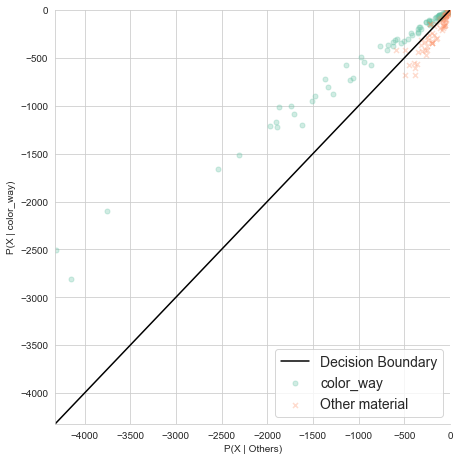

In [289]:
sns.lmplot(x = xaxis_label, y = yaxis_label, 
           data =summary_df, height = 6.5, 
           fit_reg=False, legend=False, scatter_kws={'alpha': 0.3, 's': 25}, 
           hue = labels, markers = ['o', 'x'], palette = 'Set2' )

plt.xlim([joint_log_ctg_1.min() - 10, 1])
plt.ylim([joint_log_ctg_1.min() - 10, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', SUBJECT , 'Other material'), 
           loc='lower right', fontsize = 14)

plt.show()

# False Positives and False Negatives
* The function up.unique() shows the nubmer of value 0 is 2347, the value 1 is 650.

In [290]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([200,  64]))

### True positives
* It shows, the document is 1, the True, and model also predicts it as 1, True.
* In this case, the material is fabric in CATEGORY, and the prediction also say it is fabric.

In [291]:
true_pos = (y_test == 1)&(prediction == 1)

In [292]:
true_pos.sum()

53

### True negatives
* It shows, the document is 0, the False, and the model also predicts it as 0, False.
* In this case, the material is actually trim in CATEGORY, and the prediction also say it is trim.

In [293]:
true_neg = (y_test == 0)&(prediction ==0)

In [294]:
true_neg.sum()

178

### False positives
* It shows, the document is 0, the False, and model predicts it as 1, True.
* In this case, the material is trim in CATEGORY, and yet prediction says it is fabric.

In [295]:
false_pos = (y_test == 0)&(prediction ==1)

In [296]:
false_pos.sum()

11

### False negtives
* It shows, the document is 1, the True, and model predicts it as 0, False.
* In this case, the material is fabric in CATEGORY, and yet prediction says it is trim.

In [297]:
false_neg = (y_test == 1)&(prediction == 0)

In [298]:
false_neg.sum()

22

In [299]:
(y_test == 1).sum()

100

# Recall Score
* It tells how much the model will omit the document. More the value close to 1, less the model will omit to fit document.
* It tells the reliability of the model, in other words, how much the model resemble to the relevant documents.
* More the value close to 1, less the model will omit any document.

In [300]:
recall_score = true_pos.sum() / (y_test == 1).sum()
print('Recall score is {:.2%}'. format(recall_score))

Recall score is 53.00%


# Precision Score
* It tells how precisely the model predicting.

In [301]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.828


# F-Score or F1 Score
* Closer the value to 1, better the model is.

In [302]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.65


# Record the result in a CSV file
* Record the result, so I can check the precision of the matrix

In [164]:
#record_file = pd.read_csv(RECORD_FILE, encoding = 'ISO-8859-1', index_col = 'RECORD_ID')

In [165]:
#record_file.tail()

,Csv,Rows,SUBJECT,VOCAB_SIZE,Test_size,True_Positives,True_Negatives,False_Positives,False_Negatives,TRUE_in y_test,Recall_Score,Precision_Score,F1-Score
RECORD_ID,,,,,,,,,,,,,
119,col_classify_matrix_trimed_delete-none-materia...,3820,color_way,900,0.1,81,197,5,0,107,75.70%,0.942,0.84
120,col_classify_matrix_trimed_20200330_double_the...,6473,description,900,0.1,249,206,49,38,288,86.46%,0.836,0.85
121,col_classify_matrix_trimed_20200330_double_the...,6473,description,900,0.1,262,198,40,30,296,88.51%,0.868,0.88
122,col_classify_matrix_trimed_20200330_double_the...,6473,description,900,0.1,231,203,45,36,273,84.62%,0.837,0.84
123,col_classify_matrix_trimed_delete-none-materia...,6473,description,900,0.1,243,200,43,35,278,87.41%,0.850,0.86


In [166]:
# For record in cxcel file
# new_record = {
#     'Csv':MATRIX + '_mlFixed_probs',
#     'Rows':data.shape[0],
#     'SUBJECT':SUBJECT,
#     'VOCAB_SIZE':VOCAB_SIZE,
#     'Test_size':TEST_SIZE,
#     'True_Positives':true_pos.sum(),
#     'True_Negatives':true_neg.sum(),
#     'False_Positives':false_pos.sum(),
#     'False_Negatives':false_neg.sum(),
#     'TRUE_in y_test':(y_test == 1).sum(),
#     'Recall_Score':'{:.2%}'. format(recall_score),
#     'Precision_Score':'{:.3}'.format(precision_score),
#     'F1-Score':'{:.2}'.format(f1_score),
# }

In [167]:
# the attribute 'name' of the df method .append in this case represents the index column 'RECORD_ID'
#record_file = record_file.append(pd.Series(new_record, name = record_file.shape[0]), ignore_index = False)

In [168]:
#record_file.tail()

,Csv,Rows,SUBJECT,VOCAB_SIZE,Test_size,True_Positives,True_Negatives,False_Positives,False_Negatives,TRUE_in y_test,Recall_Score,Precision_Score,F1-Score
RECORD_ID,,,,,,,,,,,,,
120,col_classify_matrix_trimed_20200330_double_the...,6473,description,900,0.1,249,206,49,38,288,86.46%,0.836,0.85
121,col_classify_matrix_trimed_20200330_double_the...,6473,description,900,0.1,262,198,40,30,296,88.51%,0.868,0.88
122,col_classify_matrix_trimed_20200330_double_the...,6473,description,900,0.1,231,203,45,36,273,84.62%,0.837,0.84
123,col_classify_matrix_trimed_delete-none-materia...,6473,description,900,0.1,243,200,43,35,278,87.41%,0.85,0.86
124,col_classify_matrix_trimed_delete-none-materia...,3820,color_way,900,0.1,75,186,3,0,100,75.00%,0.962,0.84


In [169]:
# Add time set for record file name.
# import datetime
# now = datetime.datetime.now()
# today = now.strftime('%Y-%m-%d')
# print(today)

2020-04-09


## Save the record file
* Here we save 2 copies, 1 for the main file, it will be covered and reused for next time.
* The other is a file with the date of today as backup saving in the directory 'record'

In [170]:
# Save a copy to the directory 'record'
#record_file.to_csv('record/Matrix_and_Trained-data_records_'+ today +'.csv')
# Save and cover the main file.
#record_file.to_csv('Matrix_and_Trained-data_records_main-file.csv')